In [1]:
# Importerer
import numpy as np

Eksplisitt skjema:
\begin{align}
  \frac{u^{n+1}_{i,j} - u^n_{i,j}}{\Delta t} &= \frac{1}{\Delta x^2}
                                               (u^n_{i+1,j} +
                                               u^n_{i-1,j} +
                                               u^n_{i,j+1} +
                                               u^n_{i,j-1} -4 
                                               u^n_{i,j}) - h_{i,j} \newline
  \end{align}
  
Setter $\alpha =\frac{\Delta t}{\Delta x^2}$

$$
\Rightarrow \begin{align}
  u^{n+1}_{i,j} =  u^n_{i,j} + \alpha
                                               (u^n_{i+1,j} +
                                               u^n_{i-1,j} +
                                               u^n_{i,j+1} +
                                               u^n_{i,j-1} -4 
                                               u^n_{i,j}) - \Delta th_{i,j}
\end{align}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
 
u=21*np.ones((70, 100))
u[0,20:40]=8
u[-10,-20]=40
#plt.imshow(u)

n=10
alpha=0.25      #dt/dx**2
for i in range(n):
    u[1:-1, 1:-1]+=alpha*(u[:-2, 1:-1]+
                          u[2:, 1:-1]+
                          u[1:-1, :-2]+
                          u[1:-1, 2:]-
                          4*u[1:-1, 1:-1])
#u[-10,-20]=40
plt.imshow(u)

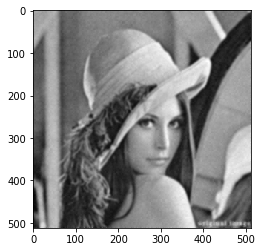

In [26]:
#Glatting
import eksplisitt as eks
im=imageio.imread('lena.png')
im=np.sum(im.astype(float),2)/(3*255) #gråtone
im = im + .05 * np.random.randn(*np.shape(im)) #legg på tilfeldig støy
im[im < 0] = 0                                 # klipp til lovlige verdier
im[im > 1] = 1


los=eks.eksplisitt(im,n=8)
im[:, 0] = im[:, 1]      # Neumann randbetingelse
im[:, -1] = im[:, -2]    #
im[0, :] = im[1, :]      #
im[-1, :] = im[-2 , :]   #

plt.imshow(im,plt.cm.gray)